# [ML] Logistic Regression
### Logistic Regression with Confusion Matrix, ROC curve, AUC. Iris dataset.
#### -- Duc Tai Dinh - AI23, HCMUS, VNUHCM --

#### I. Iris dataset

In [1]:
# 1: Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2: Prepare data
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
print(df.head())
print(df.info())

print("\nSample data size:", df.shape[0])
print("Labels:", np.unique(df['Species']))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Sample data si

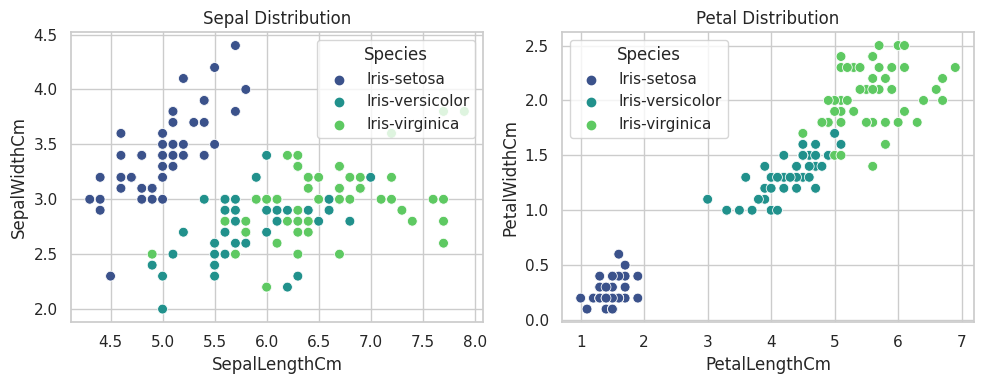

In [3]:
# 3: Visualize data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Graph 1: Sepal
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], 
                hue=df['Species'], palette="viridis", s=50, ax=ax1)
ax1.set_title("Sepal Distribution")
ax1.set_xlabel("SepalLengthCm")
ax1.set_ylabel("SepalWidthCm")

# Graph 2: Petal
sns.scatterplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], 
                hue=df['Species'], palette="viridis", s=50, ax=ax2)
ax2.set_title("Petal Distribution")
ax2.set_xlabel("PetalLengthCm")
ax2.set_ylabel("PetalWidthCm")

# Show graph
plt.tight_layout()
plt.show()

#### Model using Sepal feature, Petal feature

In [4]:
labels = df['Species'].unique()
labels.sort()  
label_to_num = {label: idx for idx, label in enumerate(labels)}

Accuracy: 0.7555555555555555

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.94      1.00      0.97        15
Iris-versicolor       0.70      0.47      0.56        15
 Iris-virginica       0.63      0.80      0.71        15

       accuracy                           0.76        45
      macro avg       0.76      0.76      0.74        45
   weighted avg       0.76      0.76      0.74        45



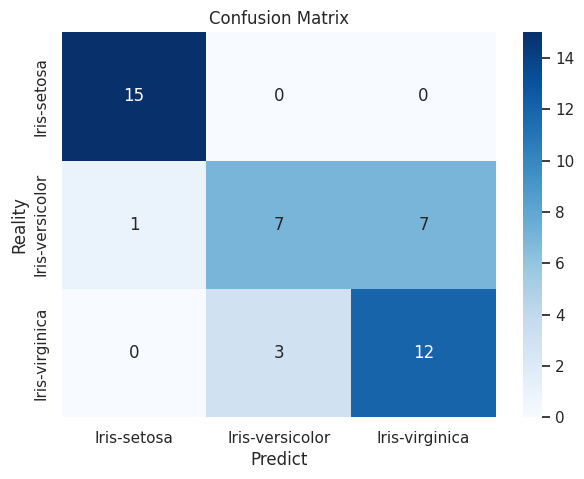

In [5]:
# ----------------------------
# Model 1: Sepal feature
# ----------------------------
features_sepal = ['SepalLengthCm', 'SepalWidthCm']
X_sepal = df[features_sepal]
y = df['Species']

X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X_sepal, y, test_size=0.3, random_state=42, stratify=y)

# Train model
model_sepal = OneVsRestClassifier(LogisticRegression(max_iter=200, solver='lbfgs'))
model_sepal.fit(X_sepal, y)

# Predict on test set
y_pred_sepal = model_sepal.predict(X_test_sepal)
y_pred_proba_sepal = model_sepal.predict_proba(X_test_sepal)[:, 1] 

# Evaluate model
print("Accuracy:", accuracy_score(y_test_sepal, y_pred_sepal))
print("\nClassification Report:")
print(classification_report(y_test_sepal, y_pred_sepal))

# Confusion Matrix
cm = confusion_matrix(y_test_sepal, y_pred_sepal, labels=labels)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_to_num,
            yticklabels=label_to_num)
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Reality")
plt.show()

# Create grid for Sepal space
x_min, x_max = X_sepal['SepalLengthCm'].min() - 0.5, X_sepal['SepalLengthCm'].max() + 0.5
y_min, y_max = X_sepal['SepalWidthCm'].min() - 0.5, X_sepal['SepalWidthCm'].max() + 0.5
xx1, yy1 = np.meshgrid(np.linspace(x_min, x_max, 200),
                       np.linspace(y_min, y_max, 200))
grid_sepal = np.c_[xx1.ravel(), yy1.ravel()]

# Predict on grid
grid_preds_sepal = model_sepal.predict(grid_sepal)
# Label to number, use for contour
grid_preds_sepal_num = np.vectorize(label_to_num.get)(grid_preds_sepal)
grid_preds_sepal_num = grid_preds_sepal_num.reshape(xx1.shape)

Accuracy: 0.9555555555555556

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



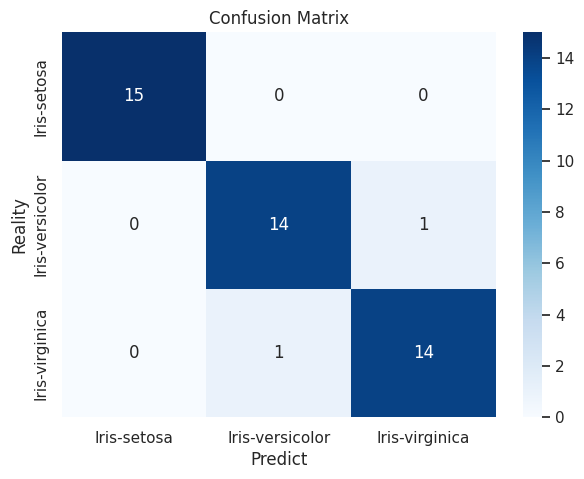

In [6]:
# ----------------------------
# Model 2: Petal feature
# ----------------------------
features_petal = ['PetalLengthCm', 'PetalWidthCm']
X_petal = df[features_petal]
y = df['Species']

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X_petal, y, test_size=0.3, random_state=42, stratify=y)

# Train model
model_petal = OneVsRestClassifier(LogisticRegression(max_iter=200, solver='lbfgs'))
model_petal.fit(X_petal, y)

# Predict on test set
y_pred_petal = model_petal.predict(X_test_petal)
y_pred_proba_petal = model_petal.predict_proba(X_test_petal)[:, 1] 

# Evaluate model
print("Accuracy:", accuracy_score(y_test_petal, y_pred_petal))
print("\nClassification Report:")
print(classification_report(y_test_petal, y_pred_petal))

# Confusion Matrix
cm = confusion_matrix(y_test_petal, y_pred_petal, labels=labels)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_to_num,
            yticklabels=label_to_num)
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Reality")
plt.show()

# Create grid for Petal space
x_min2, x_max2 = X_petal['PetalLengthCm'].min() - 0.5, X_petal['PetalLengthCm'].max() + 0.5
y_min2, y_max2 = X_petal['PetalWidthCm'].min() - 0.5, X_petal['PetalWidthCm'].max() + 0.5
xx2, yy2 = np.meshgrid(np.linspace(x_min2, x_max2, 200),
                       np.linspace(y_min2, y_max2, 200))
grid_petal = np.c_[xx2.ravel(), yy2.ravel()]

# Predict on grid
grid_preds_petal = model_petal.predict(grid_petal)
grid_preds_petal_num = np.vectorize(label_to_num.get)(grid_preds_petal)
grid_preds_petal_num = grid_preds_petal_num.reshape(xx2.shape)

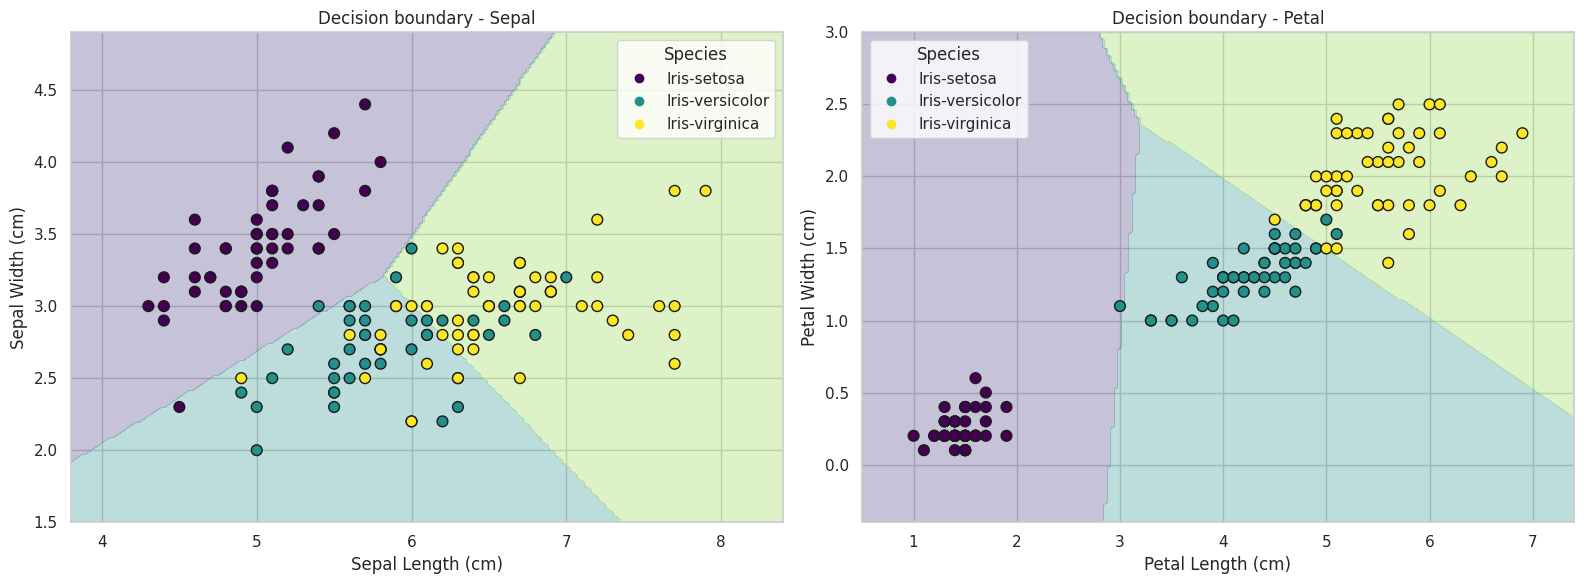

In [7]:
# ----------------------------
# Visualize 2 models
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graph 1: Sepal
ax = axes[0]
# Decision boundary
c1 = ax.contourf(xx1, yy1, grid_preds_sepal_num, alpha=0.3,
                 levels=np.arange(len(labels) + 1) - 0.5, cmap='viridis')
# Draw data points
scatter1 = ax.scatter(X_sepal['SepalLengthCm'], X_sepal['SepalWidthCm'],
                      c=y.map(label_to_num), edgecolor='k', cmap='viridis', s=60)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('Decision boundary - Sepal')

handles1, _ = scatter1.legend_elements()
ax.legend(handles1, labels, title="Species")

# Graph 2: Petal
ax = axes[1]
# Decision boundary
c2 = ax.contourf(xx2, yy2, grid_preds_petal_num, alpha=0.3,
                 levels=np.arange(len(labels) + 1) - 0.5, cmap='viridis')
# Draw data points
scatter2 = ax.scatter(X_petal['PetalLengthCm'], X_petal['PetalWidthCm'],
                      c=y.map(label_to_num), edgecolor='k', cmap='viridis', s=60)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Decision boundary - Petal')

handles2, _ = scatter2.legend_elements()
ax.legend(handles2, labels, title="Species")

plt.tight_layout()
plt.show()

#### II. Sample dataset

In [8]:
# 1: Prepare data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=18)

print("Sample data size:", X.shape[0])
print("Labels:", np.unique(y))

Sample data size: 1000
Labels: [0 1]


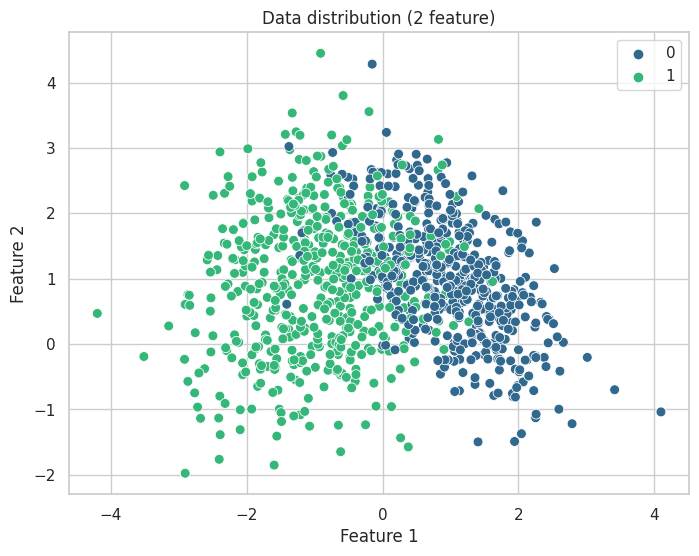

In [9]:
# 2: Visualize data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="viridis", s=50)
plt.title("Data distribution (2 feature)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [10]:
# 3: Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and Train model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

print("Model's coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Model's coefficient: [[-2.67435134 -0.5791316 ]]
Intercept: [0.87469574]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       150
           1       0.88      0.89      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



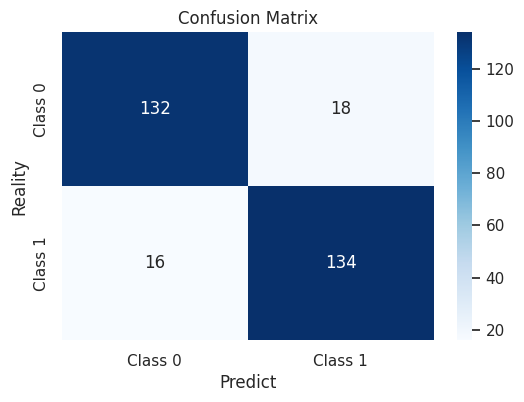

In [11]:
# 4: Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0','Class 1'], yticklabels=['Class 0','Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Reality")
plt.show()

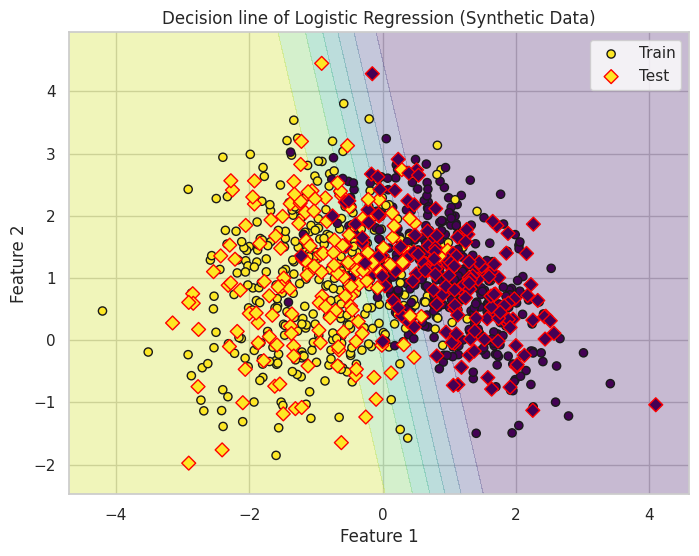

In [12]:
# 5. Visualize decision line
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict all points on grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, probs, alpha=0.3, cmap="viridis")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=35, cmap="viridis", edgecolor="k", label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50, cmap="viridis", marker="D", edgecolor="red", label="Test")
plt.title("Decision line of Logistic Regression (Synthetic Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

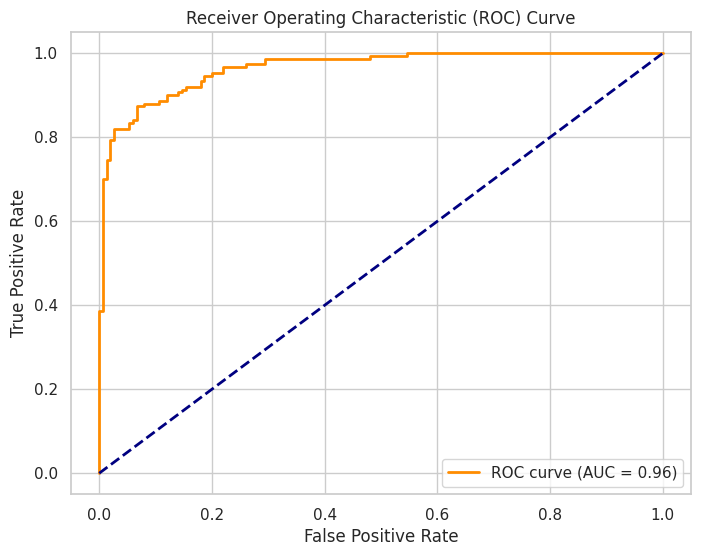

In [13]:
# 6: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()